In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [100]:
data = pd.read_csv('/kaggle/input/quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv')

In [101]:
data


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

# Data Preprocessing

In [103]:
data.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [104]:
for column in data.columns:
    data[column] = data[column].apply(lambda x: x.replace(',','.'))

In [105]:
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


# Feature Engineering

In [106]:
data['date'] =data['date'].apply(lambda x: re.search('[0-9]*[0-9]*', x).group(0))


In [107]:
data['Year'] = data['date'].apply(lambda x: re.search('^[^-]*', x).group(0))
data['Month'] = data['date'].apply(lambda x: re.search('[^-]*$', x).group(0))
data = data.drop('date',axis=1)

In [108]:
data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Year,Month
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31,2017,2017
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017,2017
2,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,...,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,2017,2017
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,2017,2017
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,299.163,...,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017,2017
737449,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017,2017
737450,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71,2017,2017
737451,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,298.045,...,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017,2017


In [121]:
data = data.astype(np.float64)

In [110]:
data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Year,Month
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,2017.0,2017.0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017.0,2017.0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,2017.0,2017.0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31,2017.0,2017.0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31,2017.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017.0,2017.0
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017.0,2017.0
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71,2017.0,2017.0
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017.0,2017.0


# Visualization


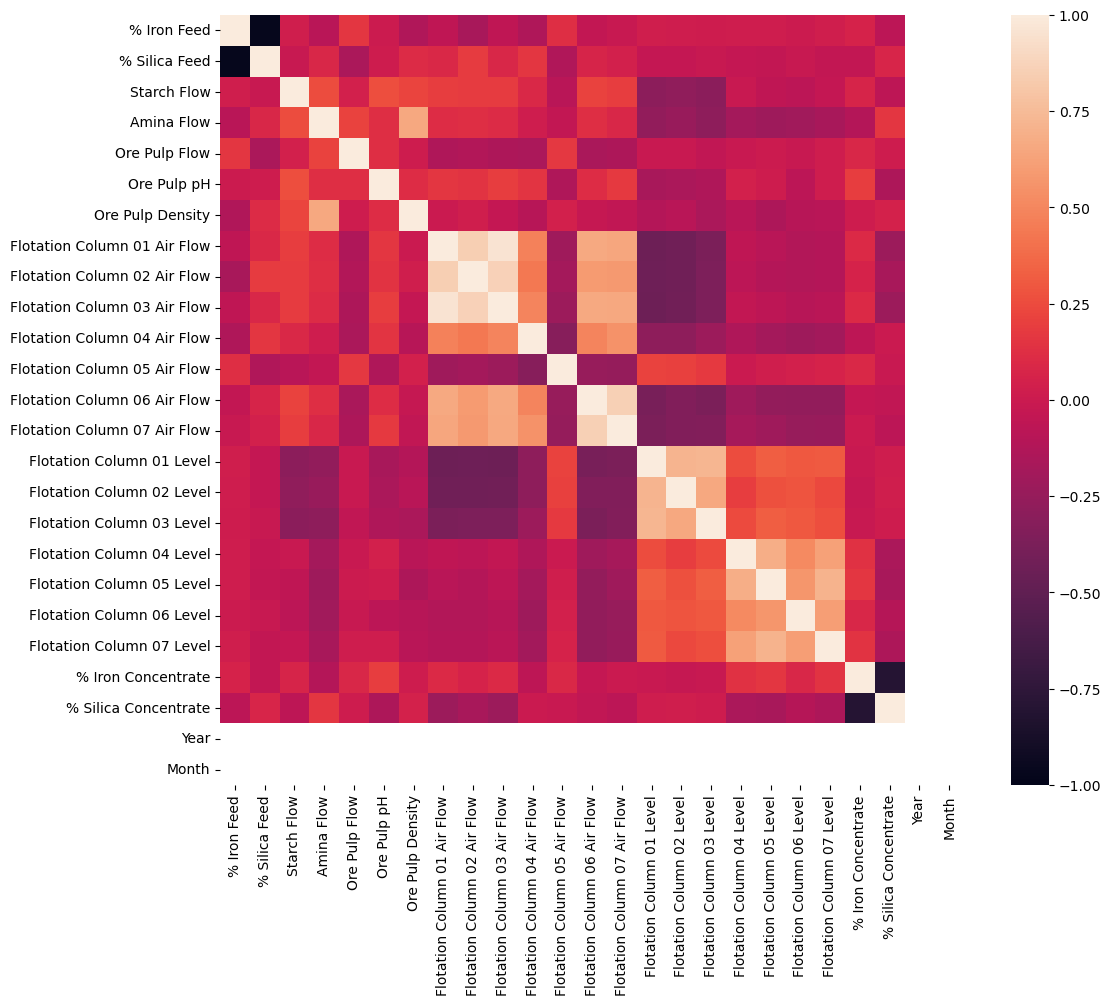

In [111]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), vmin=-1.0, vmax=1.0)
plt.show()

In [112]:
data['Year'].unique()

array([2017.])

In [113]:
data = data.drop('Year', axis=1)

In [114]:
data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Month
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,2017.0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017.0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,2017.0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31,2017.0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017.0
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017.0
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71,2017.0
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017.0


# Splitting and Scaling

In [115]:
target = '% Silica Concentrate'
y = data[target]
X_n = data.drop([target,'% Iron Concentrate'], axis=1)
X_i = data.drop(target, axis=1)

In [130]:
scaler = StandardScaler()
X_n = scaler.fit_transform(X_n)
X_i = scaler.fit_transform(X_i)

In [134]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n,y,train_size=0.7)
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i,y,train_size=0.7)

# Training

In [ ]:
model_n = LinearRegression()
model_i = LinearRegression()

In [136]:
model_n.fit (X_n_train, y_n_train)
print("Model without iron R^2 Score:", model_n.score(X_n_test, y_n_test))

Model without iron R^2 Score: 0.15304382142739137


In [139]:
model_i.fit (X_i_train, y_i_train)
print("Model with iron R^2 Score:", model_i.score(X_i_test, y_i_test)) 

Model with iron R^2 Score: 0.6785154098565317
